# Ejercicios 4.2-4

Ejercicio 3: Implementar método de Simpson de la misma forma que el ejercicio anterior. Recordando usar $$\int ^{b}_{a}f\left( x\right) dx\approx \dfrac {b-a}{6}\left[ f\left( a\right) +4f\left( \dfrac {a+b}{2}\right) +f\left( b\right) \right]$$

In [16]:
function intSim(f,a,b)
    s=((b-a)/6)*(f(a)+4f((b+a)/2)+f(b))
    println(s)
end

intSim (generic function with 2 methods)

In [17]:
f(x)=x*x*x
intSim(f,1,1)

0.0


In [19]:
f(x)=x*x
intSim(f,1,2)


2.333333333333333


Ahora, vamos a hacer un programa que me de los valores aproximados de la integral con la regla de Simpson. 


In [94]:
function intsimpson(f,a,b,n)
    s=0 #defino las variables y la suma s, donde n es la delta del grosor del intervalo
    dx=(b-a)/n;
    adx=a;
    bdx=adx+n;
    for i in 1:dx
        s+=(n/6)*(f(adx)+4*f((adx+bdx)/2)+f(bdx)) #usando la regla de simpson
        adx=bdx
        bdx=bdx+n
    end
    return s
end

intsimpson (generic function with 1 method)

In [5]:
f(x)=x*x
intsimpson(f,1,2,0.1)

2.333333333333335

In [6]:
f(x)=x*x
intsimpson(f,1,2,0.000001)

2.3333333331962534

#Interpolación polinomial en la forma de Lagrange

Dado un conjunto de $k+1$ puntos
$$(x_0,y_0),\ldots,(x_j,y_j),\ldots,(x_k,y_k)$$
donde las $x_j$ no son iguales, la interpolación polinomial en la forma de Lagrange es una combinación lineal
$$L(x):= \sum_{j=0}^{k}y_jl_j(x)$$
de las bases polinomiales de Lagrange
$$l_j(x) = \prod_{0 \le m \le k \atop m \ne j} \frac{x-x_m}{x_j-x_m}.$$
Para cada $i \ne j$, $l_j(x)$ incluye el término $(x-x_i)$ en el numerador, entonces el producto entero será cero en $x=x_i$:
$$l_{j\ne i}(x_i) = \prod_{m \ne j} \frac{x_i-x_m}{x_j-x_m} = \frac{x_i-x_0}{x_j-x_0} \ldots \frac{x_i-x_i}{x_j-x_i} \ldots \frac{x_i-x_k}{x_j-x_k} = 0.$$
Por otro lado
$$l_i(x_i) = \prod_{m \ne i} \frac{x_i-x_m}{x_i-x_m} = 1,$$
en otras palabras, todas las bases polinomiales son cero en $x=x_i$, excepto $l_i(x_i)$, para la cual se tiene $l_i(x_i)=1$. Lo que sigue es que $y_il_i(x_i) = y_i$, entonces para cada punto $x_i$, $L(x_i) = y_i+0+0+\ldots+0 = y_i$, demostrando que $L$ interpola a la función de manera exacta.

Ejercicio 4: Implementar método de interpolación de Lagrange en Julia. La función deberá recibir la lista de puntos $(x_k,y_k)$ y el lugar donde evaluamos el polinomio, note que es particularmente útil si los inputs son las listas de las $x$'s y de las $y$'s separadamente, es decir, de la misma forma en como la función plot recibe los argumentos; esto servira para verificar nuestros resultados. EJ.: Interpolador(listx,listy,x).

In [6]:
using PyPlot
function generadorlistay(f,x0)
x1= linspace(0, 2*pi, 10)
y1 = cos.(x1)
end

generadorlistay (generic function with 1 method)

In [8]:
f(x)=cos.(x)
generadorlistay(f,x0)

10-element Array{Float64,1}:
  1.0     
  0.766044
  0.173648
 -0.5     
 -0.939693
 -0.939693
 -0.5     
  0.173648
  0.766044
  1.0     

In [13]:
function interpolador(x,y,x0)
    z=Sym("z")
    k=length(x)
    l=[]
    Lagrange=0
    for j in 1:k 
        g=1
        for m in 1:j-1
            g=g*(z-x[m])/(x[j]-x[m])   # Bases l_j
        end
        for m in j+1:k #For de j-1 a k
            g=g*(z-x[m])/(x[j]-x[m])   
        end
        push!(l,g)
    end
    for j in 1:k #Valores de 1 a k para interpolar
        Lagrange=Lagrange+y[j]*l[j]      
    end
    global L=lambdify(Lagrange,[z])
    return Lagrange(x0)
end

interpolador (generic function with 1 method)

In [14]:
interpolador(x0,generadorlistay(f,x0),0)

  likely near In[14]:1
  likely near In[14]:1
  likely near In[14]:1
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


1.00000000000000

Interpole las funciones $\cos(x)$, $\cos^2(x)$ tomando un arreglo de $10$ puntos distribuidos uniformemente dentro del dominio $[0,2 \pi]$, donde el primer punto sea $0$ y el último $2\pi$. Grafique los puntos a interpolar y la funcion interpoladora.

In [3]:
using SymPy

In [4]:
x0=linspace(0,2*pi,10)

0.0:0.6981317007977318:6.283185307179586

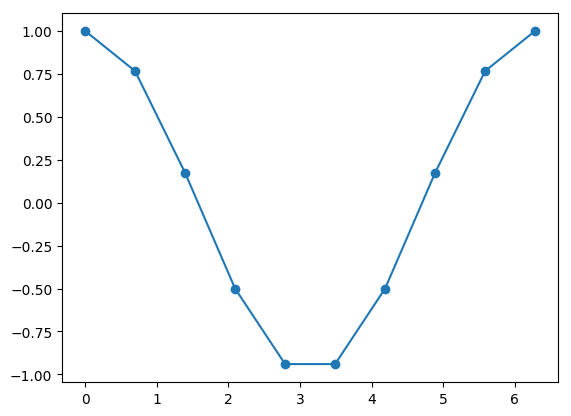

In [15]:
using PyPlot
scatter(x0,generadorlistay(f,x0))
plot(x0,L(x0));

In [65]:
f(x)=cos.(x)*cos.(x)
generadorlistay(f,x0) #No se porque me arroja los mismos valores para cos(x)

10-element Array{Float64,1}:
  1.0     
  0.766044
  0.173648
 -0.5     
 -0.939693
 -0.939693
 -0.5     
  0.173648
  0.766044
  1.0     

In [58]:
interpolador(x0,generadorlistay(g,x0),0)

1.00000000000000

In [66]:
scatter(x0,g(x0))
plot(x0,L(x0));


LoadError: [91mDimensionMismatch("Cannot multiply two vectors")[39m

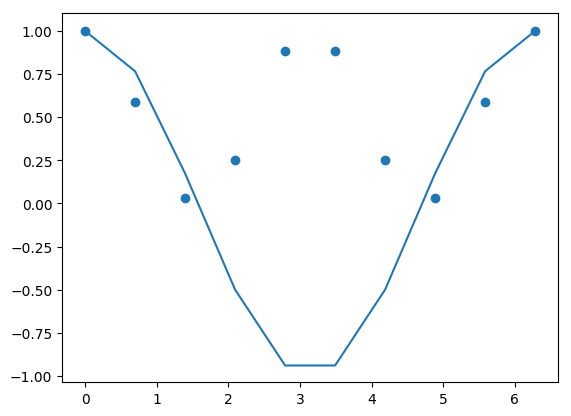

In [49]:
scatter(x0,g(x0))
plot(x0,L(x0));

Interpole los los siguientes puntos: [(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)].Grafique los puntos a interpolar y la funcion interpoladora.


In [69]:
#Llamemos a una lista las entradas x & y
x=[0,2,3,4,5,6,7]


7-element Array{Int64,1}:
 0
 2
 3
 4
 5
 6
 7

In [70]:
y=[10,-10,-4,0,5,20,-1]

7-element Array{Int64,1}:
  10
 -10
  -4
   0
   5
  20
  -1

In [71]:
interpolador(x,y,0)

10

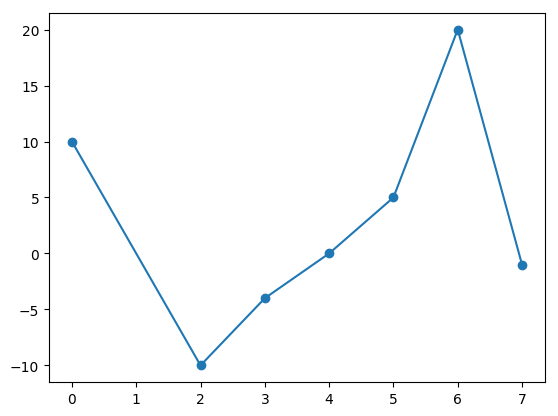

In [72]:
scatter(x,y);
plot(x,L(x));

Ejercicio 5: Comparen como convergen los métodos al valor exacto de la integral, respeco al ancho de las celdas, háganlo para $f(x)=-\sin(x)$, integrando en el intervalo $[0,2\pi]$. Es decir, para los tres métodos fijen el ancho de la celda y haganla cada vez mas pequeña, grafiquen el valor de la integral contra el inverso del acho de la celda, es decir $\int f(x) dx$ contra $1/\Delta x$. Hagan esto para los tres métodos y ponganlo en una gráfica y comenten lo que observan.]

In [75]:
f(x)=-sin(x)

f (generic function with 1 method)

In [88]:
function intriem(f,a,b,n)
    x=symbols("x") 
    l=abs((b-a)/n) #La longitud de cada subintervalo dada la partición
    g(x)=f(x) 
    st=0 
    for i in 1:n 
        punto=((2*a)+l)/2 
        si=g(punto)*l
        st=st+si 
        a=a+l
    end
    return st 
end

intriem (generic function with 1 method)

In [84]:
function inttrapec(f,a,b,n) #donde n es el intervalo de la particion
    l=(b-a)/n 
    I=0 
    for i in 1:n 
        c=a+(i*l) 
        I=I+l*f(c) 
    end
    return I 
end

inttrapec (generic function with 1 method)

In [91]:
function convergDint(f,a,b,n) #Llamemos a los tres metodos Riemman, Trapecio & Simpson con n el numero de subintervalor por la particion con longitud de (b-a)/n
    R=[] 
    T=[] 
    S=[] 
    h=[] #n/(b-a) 
    x=Sym("x")
    g=f(x) #sea g simbolica
    I=ones(length(n))*integrate(g,(x,a,b)) 
    for i in 1:length(n)   
        push!(R,intriem(f,a,b,n[i])) 
        push!(T,inttrapec(f,a,b,n[i])) 
        push!(S,intsimpson(f,a,b,n[i])) 
        push!(h,n[i]/(b-a)) 
    end
    return R,T,S,h,I 
end

convergDint (generic function with 1 method)

In [92]:
n=1:10

1:10

In [99]:
V=convergDint(f,0,2*pi,n)

(Any[-7.69468e-16, 0.0, 6.66134e-16, 2.22045e-16, -2.22045e-16, -3.33067e-16, 0.0, 5.55112e-17, 4.996e-16, -1.66533e-16], Any[1.53894e-15, 3.84734e-16, 6.88896e-17, 1.6269e-16, 8.57427e-17, 1.45467e-16, 1.08826e-16, 3.03389e-16, 2.26504e-16, 1.53894e-16], Any[-0.039844, -0.0400804, -0.041342, -1.92026, -1.1958, -0.285065, 0, 0, 0, 0], Any[0.159155, 0.31831, 0.477465, 0.63662, 0.795775, 0.95493, 1.11408, 1.27324, 1.43239, 1.59155], SymPy.Sym[0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

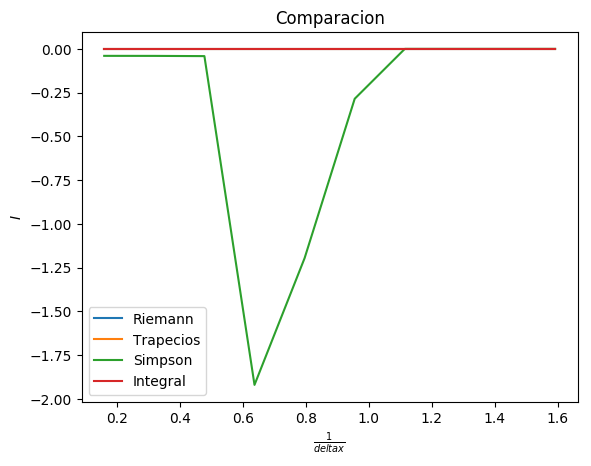

In [106]:
xlabel(L"$\frac{1}{deltax}$")
ylabel(L"$I$")
title("Comparacion")
plot(V[4],V[1],label="Riemann")
plot(V[4],V[2],label="Trapecios")
plot(V[4],V[3],label="Simpson")
plot(V[4],V[5],label="Integral")
legend()
show();
